<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/10_Logistic_regression_in_remote_sensing.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 10 Logistic regression in remote sensing</font></div>_**

# 1.0 Libraries

To install ```scikit-eo```, ```rasterio``` and ```earthpy``` you can do it with the following line:



In [ ]:
!pip install scikeo rasterio earthpy

Libraries to be used:

In [16]:
import rasterio
import numpy as np
from scikeo.linearTrend import linearTrend
import matplotlib.pyplot as plt
import matplotlib as mpl
import earthpy.plot as ep
import pandas as pd
#import statsmodels.api as sm

Connecting to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.0 Optical image

The images to be used can be downloaded [here](https://drive.google.com/drive/folders/1mGSSg_sRFS3_SeNrR390w3UEMmMwHwg8?usp=sharing):

In [4]:
# path
path_raster = "/content/drive/MyDrive/Packages/scikit-eo_data/10_LogisticRegression/Variables.tif"

# reading raster
var_img = rasterio.open(path_raster)

Let´s plot variables to be used for obtained a map of risk of forest degradation:

- Elevation
- Slope
- Land Use Land Cover
- NDVI trend
- Human Footprint
- Roads
- Mean annual temperature
- Annual precipitation

In [ ]:
ep.plot_bands(var_img.read(), cmap = 'RdYlGn', cols = 3)

Instance of ```linearTrend```:

In [6]:
inst = linearTrend(image = var_img)

Applying the ```LR()``` function:

In [7]:
logRe = inst.LR()

Optimization terminated successfully.
         Current function value: 0.282733
         Iterations 7


Dictionary of esults:

In [8]:
# dictionary as result
logRe.keys()

dict_keys(['summary_logit', 'arr_prob'])

In [ ]:
logRe.get('arr_prob')

Let´s plot the *slope* and *p-value* obtained:

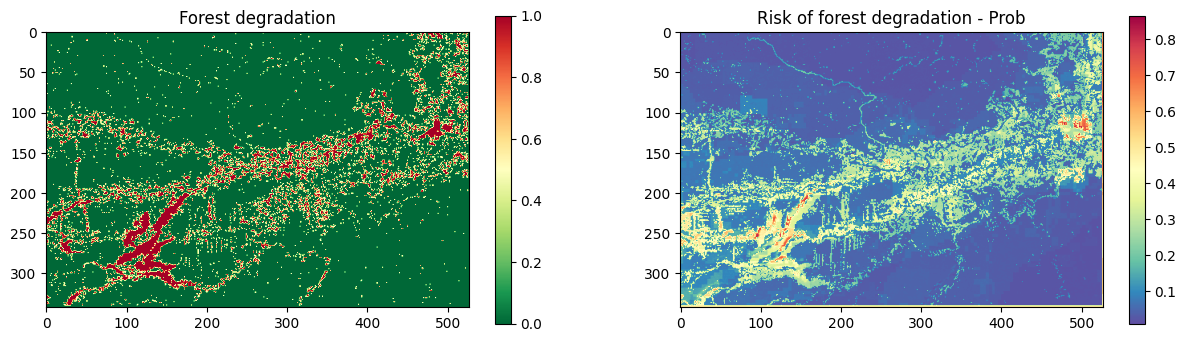

In [31]:
# colormap
col_map_1 = mpl.colormaps['Spectral']

col_map_2 = mpl.colormaps['RdYlGn']

# reversing the original colormap using reversed() function
reversed_map_1 = col_map_1.reversed()
reversed_map_2 = col_map_2.reversed()

# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
evi_2001 = axes[0].imshow(var_img.read(1), cmap = reversed_map_2)
axes[0].set_title("Forest degradation")
axes[0].grid(False)
bar1 = fig.colorbar(evi_2001, ax = axes[0])

evi_2015 = axes[1].imshow(logRe.get('arr_prob'), cmap = reversed_map_1)
axes[1].set_title("Risk of forest degradation - Prob")
axes[1].grid(False)
bar2 = fig.colorbar(evi_2015, ax = axes[1])

In [15]:
# Logit Regression Results
logRe.get('summary_logit')

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   var1   No. Observations:               180761
Model:                          Logit   Df Residuals:                   180753
Method:                           MLE   Df Model:                            7
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                  0.1705
Time:                        22:55:45   Log-Likelihood:                -51107.
converged:                       True   LL-Null:                       -61610.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var2       -5.107e-05   1.66e-05     -3.075      0.002   -8.36e-05   -1.85e-05
var3           0.0090      0.002      5.302      0.000       0.006       0.012
var4           1.8969      0.017    110.732      0.000       1.863       1.930
var5          -3.2258      0.138    -23.425      0.000      -3.496      -2.956
var6           0.0687      0.001     54.944      0.000       0.066       0.071
var7           0.0280      0.047      0.594      0.553      -0.064       0.120
var8          -0.1870      0.002   -106.140      0.000      -0.190      -0.184
var9           0.0003   1.11e-05     24.035      0.000       0.000       0.000
==============================================================================
"""